In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, StackingClassifier, RandomForestClassifier, AdaBoostClassifier

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB

import warnings

In [84]:
warnings.filterwarnings("ignore")

In [85]:
df = pd.read_csv('./data/2kdemgop.csv')

## EDA

In [86]:
df.head()

,subreddit,selftext,title,created_utc
0,Republican,NaN,Biden’s Immigration ‘Parole’ Scam: Biden is willfully failing to execute the laws faithfully when it comes to illegal immigration.,1673298341
1,Republican,NaN,Kari Lake Praises Georgia Judge Who Ordered New Election,1673297106
2,Republican,NaN,Texas authorities are searching for a man who fatally shot a suspected robber inside a Houston taco restaurant last week. The shooting death occurred inside Ranchito Taqueria at approximately 11:30 p.m. CT on Thursday. https://www.conservativenewsdaily.net/,1673296415
3,Republican,NaN,BREAKING: California DoJ Just DIRECTLY Spit In EVERY Cop’s Face- People WILL Be Heading To PRISON!!!,1673296070
4,Republican,NaN,Court to ATF Gun-Grabbers: Bump Stocks Aren’t Machine Guns and You Don’t Make the Rules,1673295099


In [87]:
df['subreddit'] = df['subreddit'].str.lower()

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   subreddit    4000 non-null   object
 1   selftext     320 non-null    object
 2   title        4000 non-null   object
 3   created_utc  4000 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 125.1+ KB


- Dropping selftext column since more than 90% is null.

In [89]:
df.drop(columns="selftext", inplace = True)
df.head()

,subreddit,title,created_utc
0,republican,Biden’s Immigration ‘Parole’ Scam: Biden is willfully failing to execute the laws faithfully when it comes to illegal immigration.,1673298341
1,republican,Kari Lake Praises Georgia Judge Who Ordered New Election,1673297106
2,republican,Texas authorities are searching for a man who fatally shot a suspected robber inside a Houston taco restaurant last week. The shooting death occurred inside Ranchito Taqueria at approximately 11:30 p.m. CT on Thursday. https://www.conservativenewsdaily.net/,1673296415
3,republican,BREAKING: California DoJ Just DIRECTLY Spit In EVERY Cop’s Face- People WILL Be Heading To PRISON!!!,1673296070
4,republican,Court to ATF Gun-Grabbers: Bump Stocks Aren’t Machine Guns and You Don’t Make the Rules,1673295099


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   subreddit    4000 non-null   object
 1   title        4000 non-null   object
 2   created_utc  4000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 93.9+ KB


In [90]:
df['subreddit'].value_counts()

republican    2000
democrats     2000
Name: subreddit, dtype: int64

In [91]:
df['subreddit'] = df['subreddit'].str.lower()
df['subreddit'].value_counts()

republican    2000
democrats     2000
Name: subreddit, dtype: int64

Creating GOP and DEM datasets for analysis

In [92]:
df_gop = df[df['subreddit'] == 'republican']
df_gop.head()

,subreddit,title,created_utc
0,republican,Biden’s Immigration ‘Parole’ Scam: Biden is willfully failing to execute the laws faithfully when it comes to illegal immigration.,1673298341
1,republican,Kari Lake Praises Georgia Judge Who Ordered New Election,1673297106
2,republican,Texas authorities are searching for a man who fatally shot a suspected robber inside a Houston taco restaurant last week. The shooting death occurred inside Ranchito Taqueria at approximately 11:30 p.m. CT on Thursday. https://www.conservativenewsdaily.net/,1673296415
3,republican,BREAKING: California DoJ Just DIRECTLY Spit In EVERY Cop’s Face- People WILL Be Heading To PRISON!!!,1673296070
4,republican,Court to ATF Gun-Grabbers: Bump Stocks Aren’t Machine Guns and You Don’t Make the Rules,1673295099


In [93]:
df_dem = df[df['subreddit'] == 'democrats']
df_dem.head()

,subreddit,title,created_utc
2000,democrats,Judge orders unsealing of Trump deposition in sexual assault case,1673297282
2001,democrats,"Republicans Signal Cuts To Social Security, Medicare With New House Majority",1673296822
2002,democrats,Kevin McCarthy Is Already Inviting the Next Pandemic Mess,1673295465
2003,democrats,The United States should revise its power structure and electoral system,1673291291
2004,democrats,please do(n't),1673290827


In [94]:
df.shape

(4000, 3)

Creation of word and letter counts by title of post

In [95]:
df_gop['word_count']= [len(x.split()) for x in df_gop['title']]
df_gop['letter_count']= [len(x) for x in df_gop['title']]

In [96]:
df_dem['word_count']= [len(x.split()) for x in df_dem['title']]
df_dem['letter_count']= [len(x) for x in df_dem['title']]

In [97]:
print(f"GOP title  mean word count: {df_gop['word_count'].mean()}")
print(f"Dems title mean word count: {df_dem['word_count'].mean()}")

GOP title  mean word count: 12.8795
Dems title mean word count: 12.208


In [98]:
print(f"GOP title  mean letter count: {df_gop['letter_count'].mean()}")
print(f"Dems title mean letter count: {df_dem['letter_count'].mean()}")

GOP title  mean letter count: 80.7925
Dems title mean letter count: 74.331


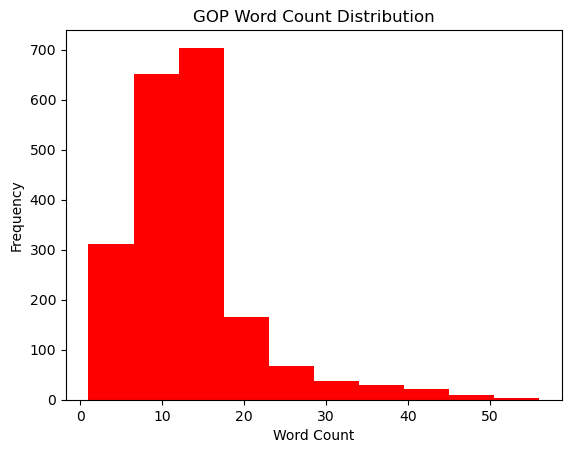

In [99]:
plt.hist(df_gop['word_count'], color = 'red')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('GOP Word Count Distribution');

plt.savefig('./images/gop_word_distr.png')

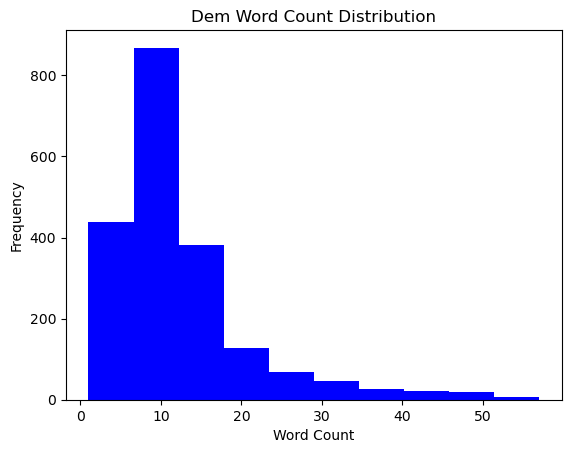

In [100]:
plt.hist(df_dem['word_count'], color = 'blue')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Dem Word Count Distribution');

plt.savefig('./images/dem_word_distr.png')

In [147]:
stop = nltk.corpus.stopwords.words('english')
stop.append('www')
stop.append('https')


In [138]:
cvec = CountVectorizer(stop_words = stop)
title_vect = cvec.fit_transform(df['title'])
titlevect_df = pd.DataFrame(title_vect.todense(), columns= cvec.get_feature_names_out())

titlevect_df.sum().sort_values(ascending=False).head(15)

trump          523
biden          371
house          241
twitter        225
republicans    205
democrats      197
gop            161
new            154
election       151
president      138
republican     133
says           120
musk           117
speaker        113
elon           112
dtype: int64

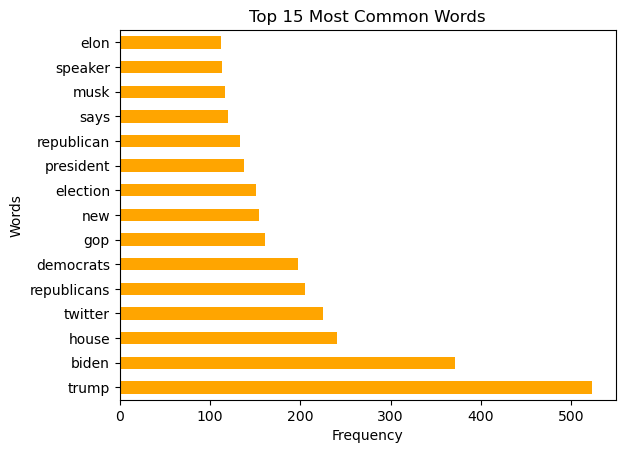

In [139]:
titlevect_df.sum().sort_values(ascending=False).head(15).plot(kind='barh', color = 'orange')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 15 Most Common Words');

Top 20 GOP Words

In [140]:
gop_cvec = CountVectorizer(stop_words = stop)
gop_title_vect = gop_cvec.fit_transform(df_gop['title'])
gop_title_vect = pd.DataFrame(gop_title_vect.todense(), columns= gop_cvec.get_feature_names_out())

gop_title_vect.sum().sort_values(ascending=False).head(20)

trump          261
biden          244
twitter        181
house          112
republicans     99
new             86
election        82
gop             78
musk            76
says            71
president       70
elon            70
files           62
fbi             62
republican      62
desantis        60
hunter          57
people          57
2024            56
covid           53
dtype: int64

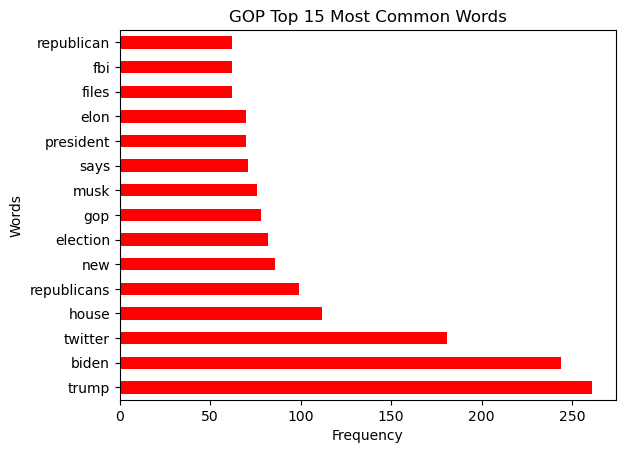

In [148]:
gop_title_vect.sum().sort_values(ascending=False).head(15).plot(kind='barh', color = 'red')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('GOP Top 15 Most Common Words');

plt.savefig('./images/gop_most_words.png', bbox_inches='tight')

Top 20 Dem Words

In [142]:
dem_cvec = CountVectorizer(stop_words = stop)
dem_title_vect = dem_cvec.fit_transform(df_dem['title'])
dem_title_vect = pd.DataFrame(dem_title_vect.todense(), columns= dem_cvec.get_feature_names_out())

dem_title_vect.sum().sort_values(ascending=False).head(20)

trump          262
democrats      154
house          129
biden          127
republicans    106
gop             83
republican      71
speaker         71
senate          70
election        69
new             68
president       68
first           57
right           56
mccarthy        55
party           54
vote            54
democratic      52
us              50
says            49
dtype: int64

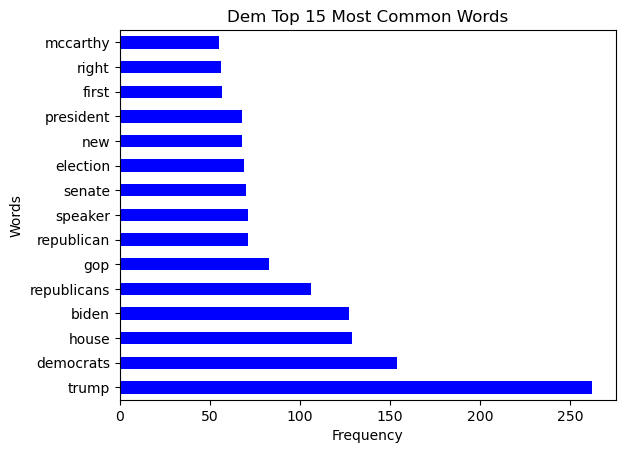

In [143]:
dem_title_vect.sum().sort_values(ascending=False).head(15).plot(kind='barh', color = 'blue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Dem Top 15 Most Common Words');

plt.savefig('./images/dem_most_words.png', bbox_inches='tight')

Top 20 GOP Two Word NGram

In [144]:
gop_cvec_ngram = CountVectorizer(stop_words = stop, ngram_range=(2,2))
gop_title_ngram = gop_cvec_ngram.fit_transform(df_gop['title'])
gop_title_ngram = pd.DataFrame(gop_title_ngram.todense(), columns= gop_cvec_ngram.get_feature_names_out())

gop_title_ngram.sum().sort_values(ascending=False).head(20)

elon musk                      59
twitter files                  55
donald trump                   47
hunter biden                   44
conservativenewsdaily net      31
https conservativenewsdaily    31
joe biden                      26
white house                    23
biden laptop                   18
house speaker                  17
social media                   17
supreme court                  17
biden admin                    17
year old                       17
kevin mccarthy                 17
free speech                    16
covid 19                       15
house republicans              15
ron desantis                   15
kari lake                      14
dtype: int64

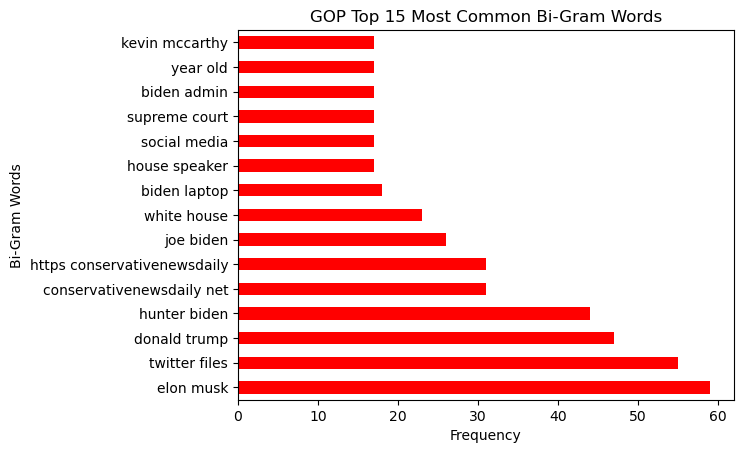

In [151]:
gop_title_ngram.sum().sort_values(ascending=False).head(15).plot(kind='barh', color = 'red')
plt.xlabel('Frequency')
plt.ylabel('Bi-Gram Words')
plt.title('GOP Top 15 Most Common Bi-Gram Words');

plt.savefig('./images/gop_most_bigram_words.png', bbox_inches='tight')

Top 20 Dem Two Word Ngram

In [110]:
dem_cvec_ngram = CountVectorizer(stop_words = stop, ngram_range=(2,2))
dem_title_ngram = dem_cvec_ngram.fit_transform(df_dem['title'])
dem_title_ngram = pd.DataFrame(dem_title_ngram.todense(), columns= dem_cvec_ngram.get_feature_names_out())

dem_title_ngram.sum().sort_values(ascending=False).head(20)

donald trump        35
elon musk           30
herschel walker     26
supreme court       23
cnn politics        22
joe biden           22
george santos       21
white house         20
kevin mccarthy      20
right wing          14
democratic party    14
nancy pelosi        14
kari lake           13
president biden     13
tax returns         13
hakeem jeffries     12
far right           11
house speaker       11
republican party    11
trump tax           11
dtype: int64

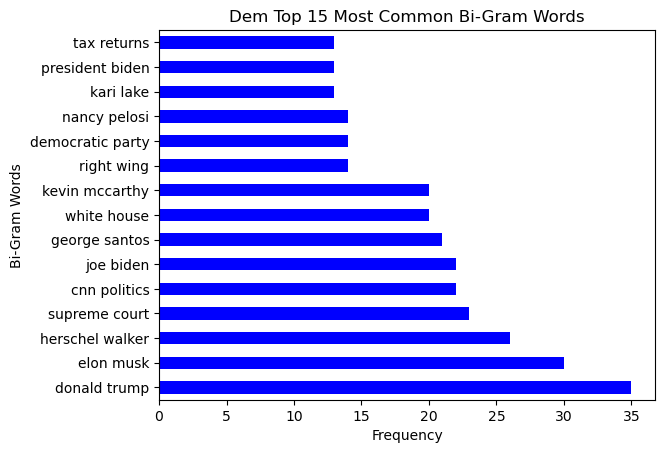

In [116]:
dem_title_ngram.sum().sort_values(ascending=False).head(15).plot(kind='barh', color = 'blue')
plt.xlabel('Frequency')
plt.ylabel('Bi-Gram Words')
plt.title('Dem Top 15 Most Common Bi-Gram Words');
plt.savefig('./images/dem_most_bigram_words.png', bbox_inches='tight')

## Modeling

In [20]:
X= df['title']
y= df['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    random_state=42,
                                                    stratify = y)

Naive Bayes

- Highest Performing Model

In [21]:
nb_pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('nb', MultinomialNB())])

In [22]:
nb_pipe_params = {
    'nb__alpha': [1, 1.5, 2],
    'tvec__stop_words': [None, stopwords.words('english'), 'english'],
    'tvec__max_features': [None, 5000],
    'tvec__min_df': [0, .01,.03],
    'tvec__max_df': [.30, .40, .50],
    'tvec__ngram_range': [(1,1), (1,2), (1,3)]
}

In [23]:
nb_gs = GridSearchCV(nb_pipe, param_grid = nb_pipe_params, n_jobs=-1)

In [24]:
nb_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'nb__alpha': [1, 1.5, 2],
                         'tvec__max_df': [0.3, 0.4, 0.5],
                         'tvec__max_features': [None, 5000],
                         'tvec__min_df': [0, 0.01, 0.03],
                         'tvec__ngram_range': [(1, 1), (1, 2), (1, 3)],
                         'tvec__stop_words': [None,
                                              ['i', 'me', 'my', 'myself', 'we',
                                               'our', 'ours', 'ourselves',
                                               'you', "you're", "you've",
                                               "you'll", "you'd", 'your',
                                               'yours', 'yourself',
                                               'yourselves', 'he', 'him', 'his',
                                               'himself', 'she', "she's", 'her',
                                               'hers', 'herself', 'it', "it's",
                                               'its', 'itself', ...],
                                              'english']})

In [25]:
nb_gs.score(X_train, y_train)

0.9603333333333334

In [26]:
nb_gs.score(X_test, y_test)

0.689

In [27]:
y_train.value_counts(normalize=True)

democrats     0.5
republican    0.5
Name: subreddit, dtype: float64

In [36]:
nb_gs.best_params_

{'nb__alpha': 2,
 'tvec__max_df': 0.3,
 'tvec__max_features': None,
 'tvec__min_df': 0,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': 'english'}

In [65]:
# Best Params
nb_pipe1 = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

nb_pipe1_params = {
    'nb__alpha': [2],
    'tvec__stop_words': ['english'],
    'tvec__max_features': [None],
    'tvec__min_df': [0],
    'tvec__max_df': [.3],
    'tvec__ngram_range': [(1,2)]
}

In [66]:
nb_gs1 = GridSearchCV(nb_pipe1, param_grid = nb_pipe1_params, n_jobs=-1)

In [67]:
nb_gs1.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'nb__alpha': [2], 'tvec__max_df': [0.3],
                         'tvec__max_features': [None], 'tvec__min_df': [0],
                         'tvec__ngram_range': [(1, 2)],
                         'tvec__stop_words': ['english']})

In [68]:
nb_gs1.score(X_train, y_train)

0.9603333333333334

In [69]:
nb_gs1.score(X_test, y_test)

0.689

In [70]:
cross_val_score(nb_gs1, X_train, y_train)

array([0.685     , 0.65666667, 0.67833333, 0.68166667, 0.66      ])

In [71]:
cross_val_score(nb_gs1, X_test, y_test)

array([0.59 , 0.69 , 0.625, 0.635, 0.675])

In [ ]:
feature_log_prob_

kNN Classifer

In [725]:
knn_pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('ss', StandardScaler(with_mean=False)),
    ('knn', KNeighborsClassifier())
])

In [732]:
knn_pipe_params = {
    'knn__n_neighbors':[7,8,9],
    'cvec__stop_words': [None, stopwords.words('english'), 'english'],
    'cvec__max_features': [50, 100, 150],
    'cvec__min_df': [.01],
    'cvec__max_df': [.3, .4, .5],
    'cvec__ngram_range': [(1, 1), (1,2)]
}

In [733]:
knn_gs = GridSearchCV(knn_pipe, param_grid = knn_pipe_params, n_jobs=-1)

In [734]:
knn_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('ss', StandardScaler(with_mean=False)),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'cvec__max_df': [0.3, 0.4, 0.5],
                         'cvec__max_features': [50, 100, 150],
                         'cvec__min_df': [0.01],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': [None,
                                              ['i', 'me', 'my', 'myself', 'we',
                                               'our', 'ours', 'ourselves',
                                               'you', "you're", "you've",
                                               "you'll", "you'd", 'your',
                                               'yours', 'yourself',
                                               'yourselves', 'he', 'him', 'his',
                                               'himself', 'she', "she's", 'her',
                                               'hers', 'herself', 'it', "it's",
                                               'its', 'itself', ...],
                                              'english'],
                         'knn__n_neighbors': [7, 8, 9]})

In [735]:
knn_gs.score(X_test, y_test)

0.616

In [736]:
knn_gs.score(X_train, y_train)

0.6663333333333333

In [737]:
knn_gs.best_params_

{'cvec__max_df': 0.3,
 'cvec__max_features': 100,
 'cvec__min_df': 0.01,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': 'english',
 'knn__n_neighbors': 8}

Random Forrest

- max features kept lowering and maximized at 200
- min df lowered to .01
- max depth maxmized at 8
- cvec .585 test and .658 train
- tvec raised it to .614 test and .682 train

In [738]:
rf_pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('rf', RandomForestClassifier())
])

In [753]:

rf_pipe_params = {
'tvec__stop_words': [None, stopwords.words('english'), 'english'],
    'tvec__max_features': [50, 100, 150],
    'tvec__min_df': [.01],
    'tvec__max_df': [.3, .4, .5],
    'tvec__ngram_range': [(1,1), (1,2)],

    'rf__n_estimators': [50, 100, 150],
    'rf__max_depth': [7, 8 , 9],
    'rf__min_samples_leaf': [1],
    'rf__random_state': [42]
}

In [754]:
rf_gs = GridSearchCV(rf_pipe, param_grid = rf_pipe_params, n_jobs=-1)

In [755]:
rf_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [7, 8, 9],
                         'rf__min_samples_leaf': [1],
                         'rf__n_estimators': [50, 100, 150],
                         'rf__random_state': [42],
                         'tvec__max_df': [0.3, 0.4, 0.5],
                         'tvec__max_features': [50, 100, 150],
                         'tvec__min_df': [0.01],
                         'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': [None,
                                              ['i', 'me', 'my', 'myself', 'we',
                                               'our', 'ours', 'ourselves',
                                               'you', "you're", "you've",
                                               "you'll", "you'd", 'your',
                                               'yours', 'yourself',
                                               'yourselves', 'he', 'him', 'his',
                                               'himself', 'she', "she's", 'her',
                                               'hers', 'herself', 'it', "it's",
                                               'its', 'itself', ...],
                                              'english']})

In [756]:
rf_gs.score(X_test, y_test)

0.613

In [757]:
rf_gs.score(X_train, y_train)

0.6383333333333333

In [758]:
rf_gs.best_params_

{'rf__max_depth': 7,
 'rf__min_samples_leaf': 1,
 'rf__n_estimators': 100,
 'rf__random_state': 42,
 'tvec__max_df': 0.3,
 'tvec__max_features': 100,
 'tvec__min_df': 0.01,
 'tvec__ngram_range': (1, 1),
 'tvec__stop_words': 'english'}

Logistic Regression

In [745]:
lr_pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('ss',StandardScaler(with_mean=False)),
    ('lr', LogisticRegression(penalty ='l2'))
])

In [746]:
lr_pipe_params = {
    'lr__C':[.1],
    'cvec__stop_words': [None, stopwords.words('english'), 'english'],
    'cvec__max_features': [100, 150, 200],
    'cvec__min_df': [.01],
    'cvec__max_df': [.3, .4, .5],
    'cvec__ngram_range': [(1,1),(1, 2), (1,3)]
}

In [747]:
lr_gs = GridSearchCV(lr_pipe, param_grid = lr_pipe_params, n_jobs=-1)

In [748]:
lr_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('ss', StandardScaler(with_mean=False)),
                                       ('lr', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'cvec__max_df': [0.3, 0.4, 0.5],
                         'cvec__max_features': [100, 150, 200],
                         'cvec__min_df': [0.01],
                         'cvec__ngram_range': [(1, 1), (1, 2), (1, 3)],
                         'cvec__stop_words': [None,
                                              ['i', 'me', 'my', 'myself', 'we',
                                               'our', 'ours', 'ourselves',
                                               'you', "you're", "you've",
                                               "you'll", "you'd", 'your',
                                               'yours', 'yourself',
                                               'yourselves', 'he', 'him', 'his',
                                               'himself', 'she', "she's", 'her',
                                               'hers', 'herself', 'it', "it's",
                                               'its', 'itself', ...],
                                              'english'],
                         'lr__C': [0.1]})

In [749]:
lr_gs.score(X_test, y_test)

0.613

In [750]:
lr_gs.score(X_train, y_train)

0.6416666666666667

In [751]:
lr_gs.best_params_

{'cvec__max_df': 0.3,
 'cvec__max_features': 100,
 'cvec__min_df': 0.01,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': 'english',
 'lr__C': 0.1}

ADABoost

In [821]:
boost_pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('boost', AdaBoostClassifier())
])

In [334]:
# # Logistic Regression - .612 test, .666 train
# boost_pipe_params = {
#     'boost__n_estimators': [30,40],
#     'boost__base_estimator':[LogisticRegression()],
#     'tvec__stop_words': ['english'],
#     'tvec__max_features': [150],
#     'tvec__min_df': [0],
#     'tvec__max_df': [.7],
#     'tvec__ngram_range': [(1, 2)]
# }

In [361]:
# # Naive Bayes.64 test, .86 train
# boost_pipe_params = {
#     'boost__n_estimators': [20, 30],
#     'boost__base_estimator':[MultinomialNB()],
#     'tvec__stop_words': [None, 'english'],
#     'tvec__max_features': [4000, 5000],
#     'tvec__min_df': [0],
#     'tvec__max_df': [.3, .4, .5],
#     'tvec__ngram_range': [(1,1), (1, 2)]
# }

In [822]:
# Random Forrest .62 test, .87 train 
boost_pipe_params = {
    'boost__n_estimators': [30,40],
    'boost__base_estimator':[RandomForestClassifier(max_depth=8, min_samples_leaf=1, n_estimators=200)],
    'tvec__stop_words': ['english'],
    'tvec__max_features': [200],
    'tvec__min_df': [0],
    'tvec__max_df': [.5, .6],
    'tvec__ngram_range': [(1, 1)]
}

In [823]:
boost_gs = GridSearchCV(boost_pipe, param_grid = boost_pipe_params, n_jobs=-1)

In [824]:
boost_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('boost', AdaBoostClassifier())]),
             n_jobs=-1,
             param_grid={'boost__base_estimator': [RandomForestClassifier(max_depth=8,
                                                                          n_estimators=200)],
                         'boost__n_estimators': [30, 40],
                         'tvec__max_df': [0.5, 0.6],
                         'tvec__max_features': [200], 'tvec__min_df': [0],
                         'tvec__ngram_range': [(1, 1)],
                         'tvec__stop_words': ['english']})

In [825]:
boost_gs.score(X_test, y_test)

0.621

In [826]:
boost_gs.score(X_train, y_train)

0.8243333333333334

In [827]:
boost_gs.best_params_

{'boost__base_estimator': RandomForestClassifier(max_depth=8, n_estimators=200),
 'boost__n_estimators': 30,
 'tvec__max_df': 0.6,
 'tvec__max_features': 200,
 'tvec__min_df': 0,
 'tvec__ngram_range': (1, 1),
 'tvec__stop_words': 'english'}

In [817]:
level1_estimators = [
    ('nb', nb_gs.best_estimator_),
    ('rf', rf_gs.best_estimator_),
    ('lr', lr_gs.best_estimator_)
]

stacked_model = StackingClassifier(estimators=level1_estimators,
                                 final_estimator = LogisticRegression())

In [818]:
stacked_model.fit(X_train, y_train)

StackingClassifier(estimators=[('nb',
                                Pipeline(steps=[('tvec',
                                                 TfidfVectorizer(max_df=0.3,
                                                                 min_df=0,
                                                                 ngram_range=(1,
                                                                              2),
                                                                 stop_words='english')),
                                                ('nb',
                                                 MultinomialNB(alpha=2))])),
                               ('rf',
                                Pipeline(steps=[('tvec',
                                                 TfidfVectorizer(max_df=0.3,
                                                                 max_features=100,
                                                                 min_df=0.01,
                                                                 stop_words='english')),
                                                ('rf',
                                                 RandomForestClassifier(max_depth=7,
                                                                        random_state=42))])),
                               ('lr',
                                Pipeline(steps=[('cvec',
                                                 CountVectorizer(max_df=0.3,
                                                                 max_features=100,
                                                                 min_df=0.01,
                                                                 ngram_range=(1,
                                                                              2),
                                                                 stop_words='english')),
                                                ('ss',
                                                 StandardScaler(with_mean=False)),
                                                ('lr',
                                                 LogisticRegression(C=0.1))]))],
                   final_estimator=LogisticRegression())

In [819]:
stacked_model.score(X_test, y_test)

0.659

In [820]:

stacked_model.score(X_train, y_train)

0.933

In [772]:
cross_val_score(stacked_model, X_train, y_train).mean()

0.6343333333333334

## Score Analysis

 - Naive Bayes was the highest performing model.

In [37]:
nb_gs.score(X_test, y_test)

0.689

In [28]:
preds = nb_gs.predict(X_test)

In [29]:
cm = confusion_matrix(y_test, preds, labels= nb_gs.classes_)

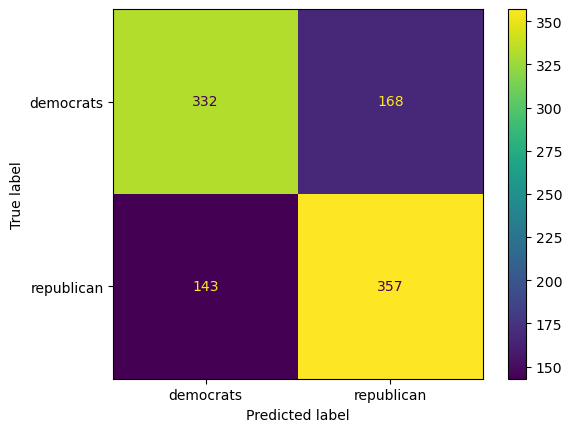

In [152]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                             display_labels=nb_gs.classes_,
                             );

disp.plot();

plt.savefig('./images/confusion_matrix.png')

In [42]:
print('Model accuracy is:', accuracy_score(y_test, preds))
print('Model precision is:', precision_score(y_test, preds, pos_label='republican'))
print('Model recall is:', recall_score(y_test, preds, pos_label='republican'))

Model accuracy is: 0.689
Model precision is: 0.68
Model recall is: 0.714


Misclassification Analysis

In [35]:
y_test.value_counts()

republican    500
democrats     500
Name: subreddit, dtype: int64

In [46]:
misclass = pd.concat([y_test.reset_index(), pd.DataFrame(preds).reset_index(), X_test.reset_index()], axis=1)

In [48]:
mclass = misclass[misclass['subreddit'] != misclass[0]]

In [50]:
pd.set_option('display.max_colwidth', None)

In [ ]:
TfidfVectorizer()

For Future Analysis

In [79]:
pd.DataFrame(list(zip(nb_gs.best_estimator_.named_steps['nb'].feature_log_prob_[0], nb_gs.best_estimator_.named_steps['tvec'].get_feature_names_out()))).reset_index().sort_values(ascending= False, by=0).head(10)

,index,0,1
22390,22390,-7.720221,trump
6057,6057,-7.879407,democrats
10637,10637,-8.133824,house
18339,18339,-8.219185,republicans
2450,2450,-8.255222,biden
20486,20486,-8.385974,speaker
9496,9496,-8.459839,gop
15746,15746,-8.468311,party
19725,19725,-8.477809,senate
18261,18261,-8.531257,republican


Missclassification Diagram

In [154]:
mclass.head(20)

,index,subreddit,index,0,index,title
1,164,republican,1,democrats,164,Rep Lauren Boebert gets into Heated Arguments with MSNBC &amp; Sean Hannity on Fox News over the Speaker of the House voting
5,2200,democrats,5,republican,2200,Republicans Are Back on Their Bullshit—and It’s Already Returning to Bite Them
6,1990,republican,6,democrats,1990,"Former, Disgraced, Twice-Impeached, One-Term Republican President announces another losing run for US Presidency"
8,1919,republican,8,democrats,1919,"The Unpopular Cure for Our Electoral Woes -- Our first president, George Washington, provided a warning of the eventual power political parties could attain."
10,1286,republican,10,democrats,1286,Test
14,2489,democrats,14,republican,2489,Trump records DISGUSTING and DANGEROUS VIDEO THREATENING America
17,3577,democrats,17,republican,3577,Manhattan DA zeroes in on Stormy Daniels hush money in Trump case: Report
24,1584,republican,24,democrats,1584,I love our democracy.
25,2406,democrats,25,republican,2406,Jamal stole my fried chicken and my watermelon
32,2550,democrats,32,republican,2550,28 Republicans Who Call Gay People 'Groomers' Just Voted Against a Bill Addressing Child Sex Abuse
